In [2]:
from pathlib import Path
import os
compe='spaceship-titanic'
iskaggle= os.environ.get('KAGGLE_KERNEL_RUNTYPE','')
if iskaggle:
    path=Path(f'../input/{compe}')
    ! pip install -Uqq fastai
else:
    import kaggle,zipfile
    path=Path(f'{compe}')
    if not path.exists():
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)

In [3]:
from fastai.tabular.all import *

pd.options.display.float_format = '{:.2f}'.format
set_seed(42)

In [4]:
df=pd.read_csv('spaceship-titanic/train.csv')
df_test=pd.read_csv('spaceship-titanic/test.csv')

In [5]:
print('shape of test',df_test.shape)
print('shape of Train',df.shape)
df['Transported']=df['Transported'].astype(int)
df.head()

shape of test (4277, 13)
shape of Train (8693, 14)


PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e 39.00  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e 24.00  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e 58.00   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e 33.00  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e 16.00  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0         0.00       0.00          0.00    0.00    0.00    Maham Ofracculy   
1       109.00       9.00         25.00  549.00   44.00       Juanna Vines   
2        43.00    3576.00          0.00 6715.00   49.00      Altark Susent   
3         0.00    1283.00        371.00 3329.00  193.00       Solam Susent   
4       303.00      70.00        151.00  565.00    2.00  Willy Santantines   

   Transported  
0            0  
1            1  
2            0  
3            0  
4            1

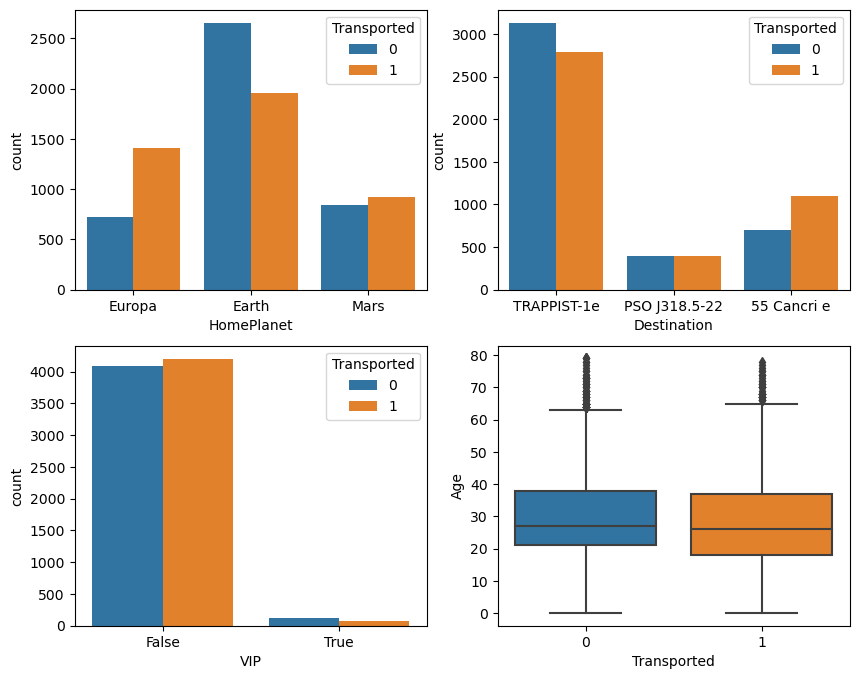

In [36]:
import seaborn as sns
fig,axs = plt.subplots(2,2, figsize=(10,8))
sns.countplot(data=df,hue=df['Transported'],x=df['HomePlanet'],ax=axs[0][0])
sns.countplot(data=df, x='Destination', hue='Transported',ax=axs[0][1])
sns.countplot(data=df, x='VIP', hue='Transported',ax=axs[1][0])
sns.boxplot(data=df,x=df['Transported'],y=df['Age'],ax=axs[1][1])

# sns.countplot(data=df,x=df['HomePlanet'],ax=axs[1])
plt.show()

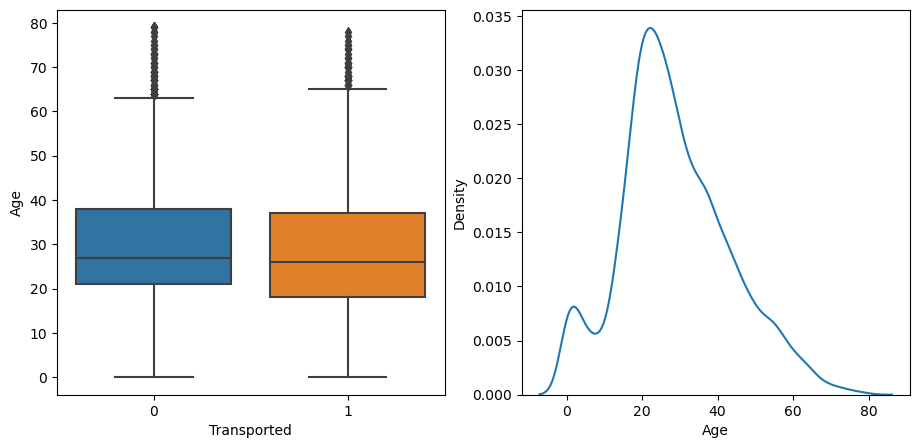

In [13]:
fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.boxplot(data=df,x=df['Transported'],y=df['Age'],ax=axs[0])
sns.kdeplot(data=df,x=df['Age'],ax=axs[1])
plt.show()

In [226]:
def featureEng(X):
    X['Extras']=np.log1p(X[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1))
    cols=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Age']
    X[['c1','c2','c3']]=X['Cabin'].str.split('/',expand=True)
    X.drop(['c2','Cabin'],axis=1,inplace=True)
    X[cols]=np.log1p(X[cols])
    return X

In [227]:
def afterFe():
    X_train=featureEng(df.copy())
    X_test=featureEng(df_test.copy())
    print('after Fe done')
    return (X_train,X_test)
    

In [228]:
X_train,X_test=afterFe()

after Fe done


In [216]:
X_train

PassengerId HomePlanet CryoSleep     Cabin    Destination  Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e 3.69  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e 3.22  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e 4.08   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e 3.53  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e 2.83  False   
...          ...        ...       ...       ...            ...  ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e 3.74   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22 2.94  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e 3.30  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e 3.50  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e 3.81  False   

      RoomService  FoodCourt  ShoppingMall  Spa  VRDeck               Name  \
0            0.00       0.00          0.00 0.00    0.00    Maham Ofracculy   
1            4.70       2.30          3.26 6.31    3.81       Juanna Vines   
2            3.78       8.18          0.00 8.81    3.91      Altark Susent   
3            0.00       7.16          5.92 8.11    5.27       Solam Susent   
4            5.72       4.26          5.02 6.34    1.10  Willy Santantines   
...           ...        ...           ...  ...     ...                ...   
8688         0.00       8.83          0.00 7.40    4.32  Gravior Noxnuther   
8689         0.00       0.00          0.00 0.00    0.00    Kurta Mondalley   
8690         0.00       0.00          7.54 0.69    0.00       Fayey Connon   
8691         0.00       6.96          0.00 5.87    8.08   Celeon Hontichre   
8692         4.84       8.45          0.00 0.00    2.56   Propsh Hontichre   

      Transported  Extras c1 c3  
0               0    0.00  B  P  
1               1    6.60  F  S  
2               0    9.25  A  S  
3               0    8.55  A  S  
4               1    7.00  F  S  
...           ...     ... .. ..  
8688            0    9.05  A  P  
8689            0    0.00  G  S  
8690            1    7.54  G  S  
8691            0    8.44  E  S  
8692            1    8.48  E  S  

[8693 rows x 17 columns]

In [93]:
pr=pd.DataFrame()
# pr['pred']=0 if df.HomePlanet=='Earth' 1 elif if df.HomePlanet=='Europa' else 0
pr['pred'] = df['HomePlanet'].apply(lambda x: False if x == 'Earth' else (True if x == 'Europa' else False))
# pr.head(10)

In [89]:
import subprocess
def make_sub(pred_y,sub_data=df_test,name='default'):
    df_submission = pd.DataFrame()
    df_submission['PassengerId']=df_test['PassengerId']
    df_submission['Transported']=pred_y
    df_submission.to_csv(f'submission-{name}.csv', index=False)
    cmd =f'kaggle competitions submit -c {compe} -f submission-{name}.csv -m "Message"'
    subprocess.run(cmd, shell=True)
    print(f'succesully saved - {name}')


In [92]:
make_sub(pr['pred'],name='checking_all_true')

100%|██████████| 54.3k/54.3k [00:01<00:00, 53.7kB/s]


Successfully submitted to Spaceship Titanicsuccesully saved - checking_all_true


***
<font size="5"><b> Dumb model =Score: 0.50689 </b>
</font>
***


In [117]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Custom transformer for feature engineering
class FeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X

steps = [  # Custom feature engineering
    ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('feature_engineering', FeatureEngineeringTransformer()),
    ('encoder', OneHotEncoder()),# Replace missing values with the most frequent value
    ('scaler', StandardScaler()),  # Standardize the features
    ('classifier', RandomForestClassifier())  # Classifier for training
]

In [241]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        (
            "imputation_constant",
            SimpleImputer(fill_value="missing", strategy="most_frequent"),
        ),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, cat_cols),
        ("numerical", numeric_preprocessor,num_cols),
    ]
)

pipe = make_pipeline(preprocessor, RandomForestClassifier())
pipe  # click on the diagram below to see the details of each step

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Name', 'c1', 'c3'], dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Extras'],
      dtype='object'))])),
                ('randomforestclassifier', RandomForestClassifier())])

In [238]:
cat_cols = X_train.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)
print(cat_cols)

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Extras'],
      dtype='object')
Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Name', 'c1', 'c3'], dtype='object')


In [179]:
total_vip_passengers = df[df['VIP'] == True].shape[0]
vip_in_cryo_sleep = df[(df['VIP'] == True) & (df['CryoSleep'] == True)].shape[0]

percentage = (vip_in_cryo_sleep / total_vip_passengers) * 100
print(f"Percentage of VIP passengers in cryo sleep: {percentage:.2f}%")


total_vip_passengers = df[(df['VIP'] == True) & (df['CryoSleep'] == False)].shape[0]
vip_spent_money = X_train[(X_train['VIP'] == True) & (X_train['Extras'] >0)].shape[0]
percentage = (vip_spent_money / total_vip_passengers) * 100
print(f"Percentage of VIP spent: {percentage:.2f}%")

total_vip_passengers = df[(df['VIP'] == False) & (df['CryoSleep'] == False)].shape[0]
vip_spent_money = X_train[(X_train['VIP'] == False) & (X_train['Extras'] >0)].shape[0]
percentage = (vip_spent_money / total_vip_passengers) * 100
print(f"Percentage of non VIP spent: {percentage:.2f}%")

Percentage of VIP passengers in cryo sleep: 10.55%
Percentage of VIP spent: 153.71%
Percentage of non VIP spent: 92.53%


In [188]:
# If they spent some money for extras then they should be not in cryosleep
def missing_cryosleep(X_train):
    X_train.loc[(X_train['CryoSleep'].isna()) & (X_train['Extras'] > 0), 'CryoSleep'] = False
    X_train.loc[(X_train.CryoSleep.isna())]=True
    return X_train

In [190]:
X_test.loc[(X_test.CryoSleep.isna())]
X_test=missing_cryosleep(X_test.copy())

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, Extras]
Index: []

In [233]:
X_train.drop('PassengerId',axis=1,inplace=True)
X_test.drop('PassengerId',axis=1,inplace=True)

In [234]:
X_train.head()

HomePlanet CryoSleep  Destination  Age    VIP  RoomService  FoodCourt  \
0     Europa     False  TRAPPIST-1e 3.69  False         0.00       0.00   
1      Earth     False  TRAPPIST-1e 3.22  False         4.70       2.30   
2     Europa     False  TRAPPIST-1e 4.08   True         3.78       8.18   
3     Europa     False  TRAPPIST-1e 3.53  False         0.00       7.16   
4      Earth     False  TRAPPIST-1e 2.83  False         5.72       4.26   

   ShoppingMall  Spa  VRDeck               Name  Transported  Extras c1 c3  
0          0.00 0.00    0.00    Maham Ofracculy            0    0.00  B  P  
1          3.26 6.31    3.81       Juanna Vines            1    6.60  F  S  
2          0.00 8.81    3.91      Altark Susent            0    9.25  A  S  
3          5.92 8.11    5.27       Solam Susent            0    8.55  A  S  
4          5.02 6.34    1.10  Willy Santantines            1    7.00  F  S

In [235]:

X_test.head()

HomePlanet CryoSleep  Destination  Age    VIP  RoomService  FoodCourt  \
0      Earth      True  TRAPPIST-1e 3.33  False         0.00       0.00   
1      Earth     False  TRAPPIST-1e 3.00  False         0.00       2.30   
2     Europa      True  55 Cancri e 3.47  False         0.00       0.00   
3     Europa     False  TRAPPIST-1e 3.66  False         0.00       8.80   
4      Earth     False  TRAPPIST-1e 3.04  False         2.40       0.00   

   ShoppingMall  Spa  VRDeck              Name  Extras c1 c3  
0          0.00 0.00    0.00   Nelly Carsoning    0.00  G  S  
1          0.00 7.95    0.00    Lerome Peckers    7.95  F  S  
2          0.00 0.00    0.00   Sabih Unhearfus    0.00  C  S  
3          0.00 5.20    6.37  Meratz Caltilter    8.91  C  S  
4          6.46 0.00    0.00   Brence Harperez    6.47  F  S

In [236]:
Y=X_train['Transported']
X=X_train.drop('Transported',axis=1,inplace=False)

In [242]:
pipe.fit(X,Y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Name', 'c1', 'c3'], dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Extras'],
      dtype='object'))])),
                ('randomforestclassifier', RandomForestClassifier())])

In [239]:
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)
print(cat_cols)

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Extras'],
      dtype='object')
Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Name', 'c1', 'c3'], dtype='object')


In [244]:
preds=pipe.predict(X_test)

In [249]:
make_sub(preds_bool,name='rf-own-1')

100%|██████████| 56.5k/56.5k [00:00<00:00, 70.7kB/s]


Successfully submitted to Spaceship Titanicsuccesully saved - rf-own-1


In [ ]:
def model_fit(X_train,X_test):
    Y=X_train['Transported']
    X_train.drop('PassengerId', axis=1, inplace=True, errors='ignore')

In [277]:
def model_imp(model_name):
    model = pipe.named_steps[model_name]
    importances = model.feature_importances_
    importances
    feature_names = X.columns
    feature_importances = sorted(zip(importances, feature_names), reverse=True)
    k=20
    top_features = feature_importances[:k]
    features = [feature for importance, feature in top_features]
    importance_values = [importance for importance, feature in top_features]
    plt.figure(figsize=(10, 6))
    plt.bar(features, importance_values)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Top Features')
    plt.xticks(rotation=45)
    plt.show()

In [279]:
from xgboost import XGBClassifier
pipe.steps[-1] = ('xgbclassifier', XGBClassifier())

In [265]:
pipe.fit(X, Y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Name', 'c1', 'c3'], dtype='object')),
                                                 ('numerical',
                                                  Pipeline(step...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [271]:
preds=pipe.predict(X_test).astype(bool)

In [273]:
make_sub(preds,name='xgb')

100%|██████████| 56.4k/56.4k [00:00<00:00, 60.8kB/s]


Successfully submitted to Spaceship Titanicsuccesully saved - xgb


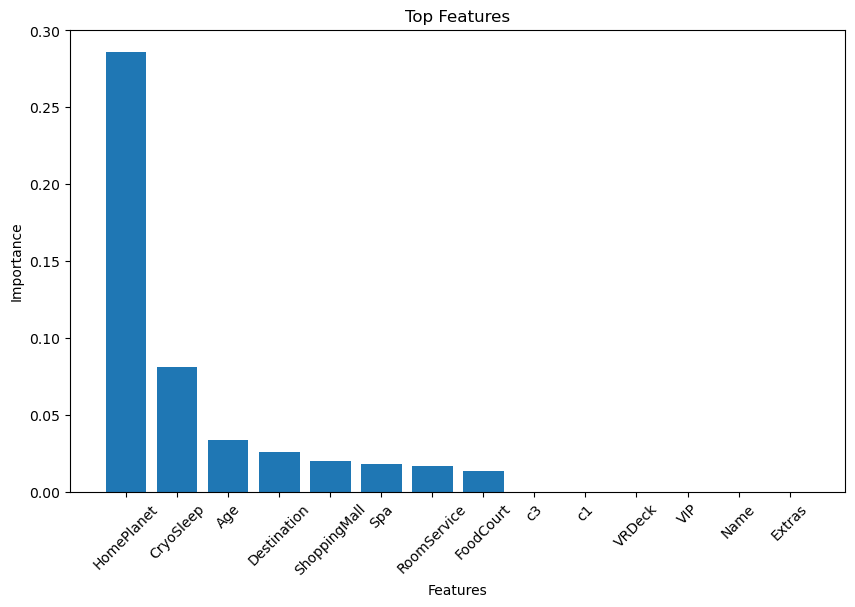

In [278]:
model_imp('xgbclassifier')